In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
accident= pd.read_csv("C://Users//Deep.ai//Desktop//Gboy PS//SODEX//OPTION1_uk_road_accident_2019_coursework_final.csv")

In [3]:
accident.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


In [4]:
accident.shape

(31647, 14)

In [5]:
accident.columns

Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')

In [6]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accident_index               31647 non-null  object 
 1   speed_limit                  31647 non-null  int64  
 2   light_conditions             31647 non-null  object 
 3   weather_conditions           31647 non-null  object 
 4   road_surface_conditions      31647 non-null  object 
 5   vehicle_type                 31647 non-null  object 
 6   junction_location            31647 non-null  object 
 7   skidding_and_overturning     31647 non-null  object 
 8   vehicle_leaving_carriageway  31647 non-null  object 
 9   hit_object_off_carriageway   31647 non-null  object 
 10  first_point_of_impact        31647 non-null  object 
 11  sex_of_driver                31647 non-null  object 
 12  age_of_oldest_driver         25197 non-null  float64
 13  accident_severit

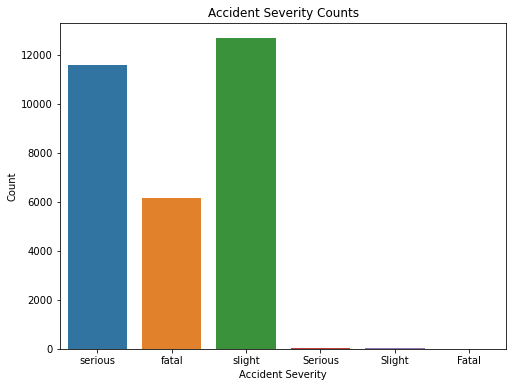

In [7]:

# 1. Bar plot: Accident severity counts
plt.figure(figsize=(8, 6))
sns.countplot(x='accident_severity', data=accident)
plt.title('Accident Severity Counts')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()


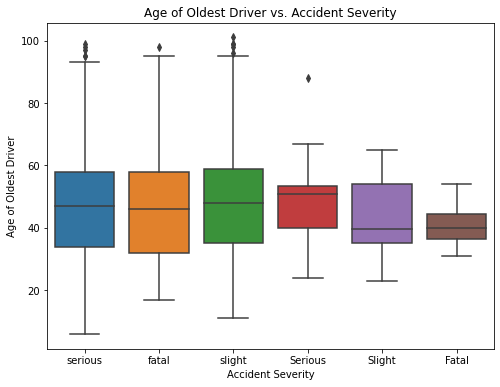

In [8]:

# 2. Box plot: Age of oldest driver vs. accident severity
plt.figure(figsize=(8, 6))
sns.boxplot(x='accident_severity', y='age_of_oldest_driver', data=accident)
plt.title('Age of Oldest Driver vs. Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Age of Oldest Driver')
plt.show()

# The data is very misplaces as the serious and Serious are the same valuies and this goes for other too so will replave these values 

In [9]:
accident["accident_severity"].value_counts()

slight     12672
serious    11592
fatal       6159
Serious       25
Slight        19
Fatal          8
Name: accident_severity, dtype: int64

In [10]:
# Function to clean and capitalize the values in 'accident_severity' column
# Remove rows with NaN or null values in the 'accident_severity' column
accident = accident.dropna(subset=['accident_severity'])

def clean_accident_severity(value):
    return value.lower().capitalize()

# Apply the function to the 'accident_severity' column
accident['accident_severity'] = accident['accident_severity'].apply(clean_accident_severity)

# Check the updated value counts
print(accident['accident_severity'].value_counts())


Slight     12691
Serious    11617
Fatal       6167
Name: accident_severity, dtype: int64


# Now plotting graphs 

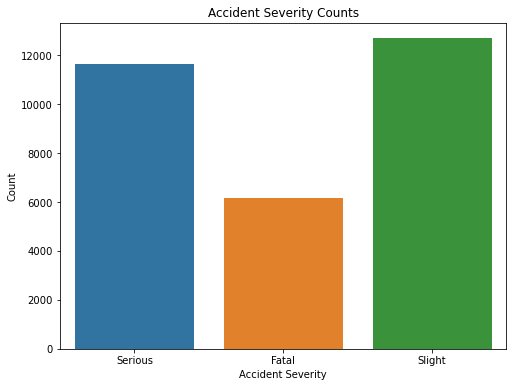

In [11]:

# 1. Bar plot: Accident severity counts
plt.figure(figsize=(8, 6))
sns.countplot(x='accident_severity', data=accident)
plt.title('Accident Severity Counts')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()


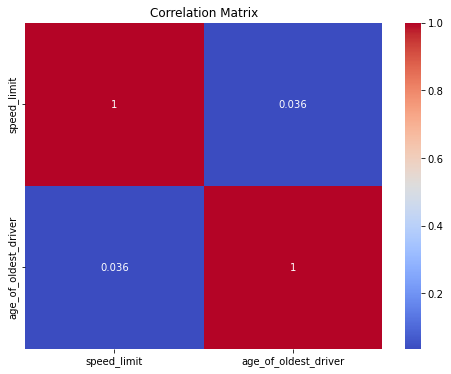

In [12]:
# 3. Heatmap: Correlation matrix
plt.figure(figsize=(8, 6))
corr = accident.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

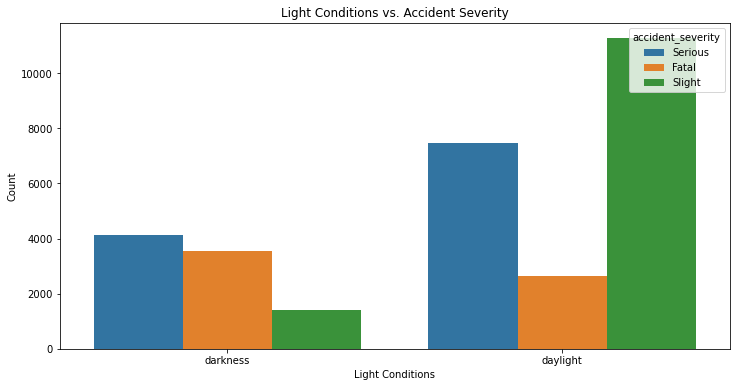

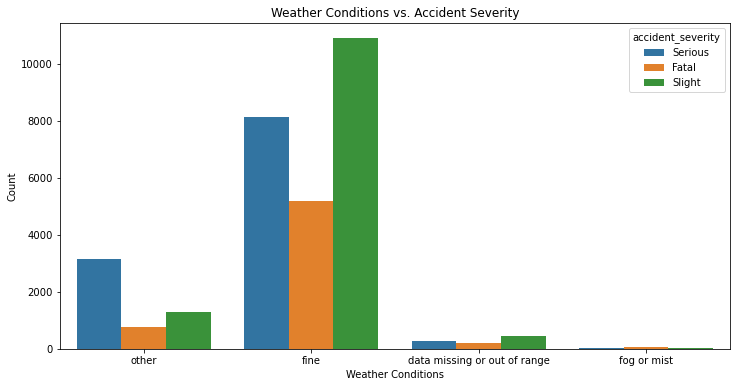

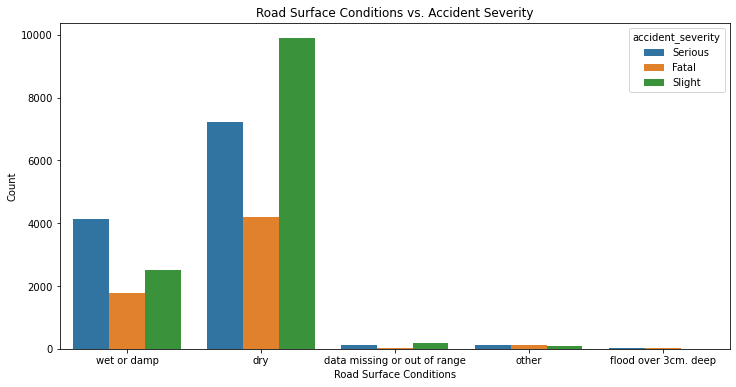

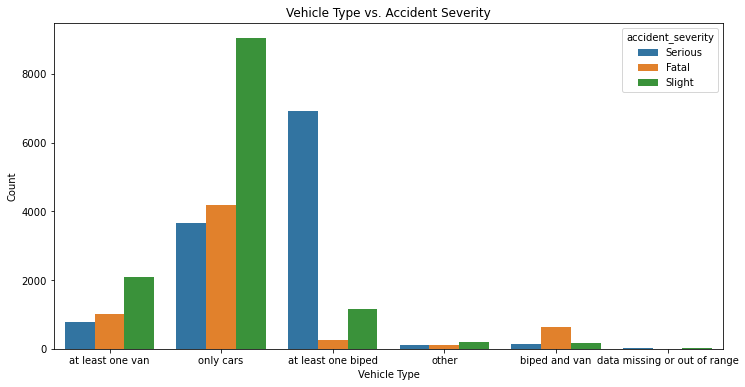

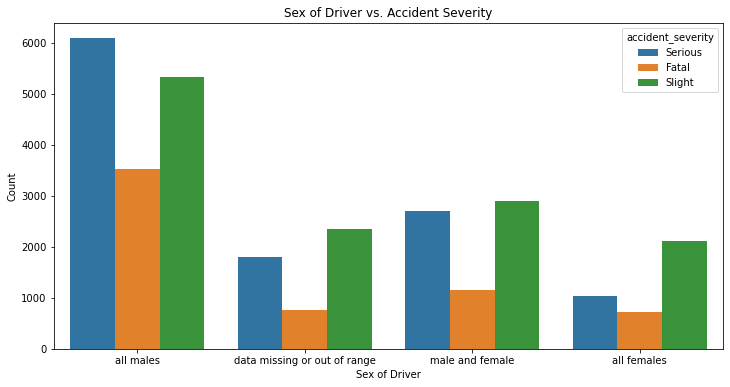

In [13]:

# Function for creating stacked bar plots
def plot_stacked_bar(df, x, y, hue, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=x, hue=hue, data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=hue, loc='upper right')
    plt.show()

# 4. Stacked bar plot: Light conditions vs. accident severity
plot_stacked_bar(accident, 'light_conditions', 'accident_severity', 'accident_severity', 'Light Conditions vs. Accident Severity', 'Light Conditions', 'Count')

# 5. Stacked bar plot: Weather conditions vs. accident severity
plot_stacked_bar(accident, 'weather_conditions', 'accident_severity', 'accident_severity', 'Weather Conditions vs. Accident Severity', 'Weather Conditions', 'Count')

# 6. Stacked bar plot: Road surface conditions vs. accident severity
plot_stacked_bar(accident, 'road_surface_conditions', 'accident_severity', 'accident_severity', 'Road Surface Conditions vs. Accident Severity', 'Road Surface Conditions', 'Count')

# 7. Stacked bar plot: Vehicle type vs. accident severity
plot_stacked_bar(accident, 'vehicle_type', 'accident_severity', 'accident_severity', 'Vehicle Type vs. Accident Severity', 'Vehicle Type', 'Count')

# 8. Stacked bar plot: Sex of driver vs. accident severity
plot_stacked_bar(accident, 'sex_of_driver', 'accident_severity', 'accident_severity', 'Sex of Driver vs. Accident Severity', 'Sex of Driver', 'Count')

In [14]:
accident.isna().sum()

accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6188
accident_severity                 0
dtype: int64

 # We can fill in the missing values with a suitable value, such as the mean, median, or mode of the available ages. This can be done using the fillna() function:

In [15]:
mean_age = accident['age_of_oldest_driver'].mean()
accident['age_of_oldest_driver'] = accident['age_of_oldest_driver'].fillna(mean_age)


In [16]:
accident.isna().sum()

accident_index                 0
speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64

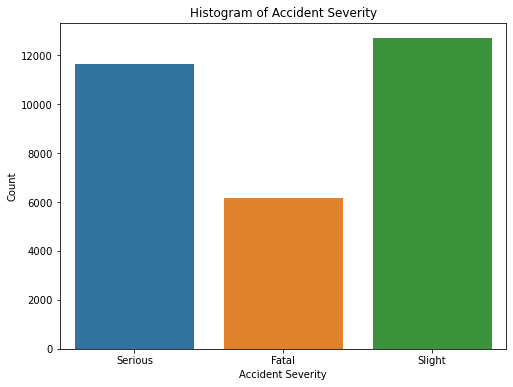

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for the 'accident_severity' column
plt.figure(figsize=(8, 6))
sns.countplot(x='accident_severity', data=accident)
plt.title('Histogram of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()


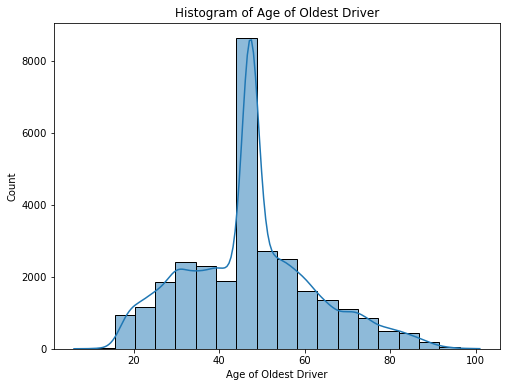

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for the 'age_of_oldest_driver' column
plt.figure(figsize=(8, 6))
sns.histplot(data=accident, x='age_of_oldest_driver', bins=20, kde=True)
plt.title('Histogram of Age of Oldest Driver')
plt.xlabel('Age of Oldest Driver')
plt.ylabel('Count')
plt.show()


# Dropping the Accident Index columns

In [19]:
# Drop the 'accident_index' column
accident = accident.drop(columns=['accident_index'])

# Print the value counts for each column
for column in accident.columns:
    print(f"Value counts for '{column}':")
    print(accident[column].value_counts())
    print("\n")


Value counts for 'speed_limit':
 30    17999
 60     4029
 20     3094
 40     2611
 70     1530
 50     1188
-1        24
Name: speed_limit, dtype: int64


Value counts for 'light_conditions':
daylight    21379
darkness     9096
Name: light_conditions, dtype: int64


Value counts for 'weather_conditions':
fine                            24226
other                            5202
data missing or out of range      936
fog or mist                       111
Name: weather_conditions, dtype: int64


Value counts for 'road_surface_conditions':
dry                             21294
wet or damp                      8426
other                             355
data missing or out of range      348
flood over 3cm. deep               52
Name: road_surface_conditions, dtype: int64


Value counts for 'vehicle_type':
only cars                       16850
at least one biped               8341
at least one van                 3876
biped and van                     963
other                             

# Data cleaning and processing 

In [20]:
# Convert all the column values to lowercase strings
columns_to_clean = ['light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type', 'junction_location', 'skidding_and_overturning', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver']
for column in columns_to_clean:
    accident[column] = accident[column].str.lower()

# Function to process the columns
def process_columns(data):
    # Combine 'data missing or out of range' with 'other' for columns with 'data missing or out of range' category
    columns_to_replace = ['weather_conditions', 'road_surface_conditions', 'vehicle_type', 'junction_location', 'skidding_and_overturning', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver']
    for col in columns_to_replace:
        data[col] = data[col].replace('data missing or out of range', 'other')

    # Combine 'male and female' and 'other' categories in 'sex_of_driver'
    data['sex_of_driver'] = data['sex_of_driver'].replace('male and female', 'other')

    return data

# Apply the function to the dataset
accident = process_columns(accident)

# Print the processed value counts for each column
for column in accident.columns:
    print(f"Processed value counts for '{column}':")
    print(accident[column].value_counts())
    print("\n")


Processed value counts for 'speed_limit':
 30    17999
 60     4029
 20     3094
 40     2611
 70     1530
 50     1188
-1        24
Name: speed_limit, dtype: int64


Processed value counts for 'light_conditions':
daylight    21379
darkness     9096
Name: light_conditions, dtype: int64


Processed value counts for 'weather_conditions':
fine           24226
other           6138
fog or mist      111
Name: weather_conditions, dtype: int64


Processed value counts for 'road_surface_conditions':
dry                     21294
wet or damp              8426
other                     703
flood over 3cm. deep       52
Name: road_surface_conditions, dtype: int64


Processed value counts for 'vehicle_type':
only cars             16850
at least one biped     8341
at least one van       3876
biped and van           963
other                   445
Name: vehicle_type, dtype: int64


Processed value counts for 'junction_location':
at or within 20 metres of junction        16564
not at or within 20 metr

# CHANGING THE CATEGORICAL VARIBLES USING LABEL ENCODE 

In [21]:
# Drop all the rows containing null or NaN values
from sklearn.preprocessing import LabelEncoder
accident = accident.dropna()

# Initialize a dictionary to store the LabelEncoders for each column
label_encoders = {}

# Apply LabelEncoder to object-type columns
for column in accident.select_dtypes(include='object').columns:
    le = LabelEncoder()
    accident[column] = le.fit_transform(accident[column])
    label_encoders[column] = le

# Print the encoded dataframe
print(accident.head())

# Print the label encoders for each column
for column, le in label_encoders.items():
    print(f"Labels for '{column}':")
    print(dict(zip(le.classes_, le.transform(le.classes_))))
    print("\n")


   speed_limit  light_conditions  weather_conditions  road_surface_conditions  \
0           30                 0                   2                        3   
1           30                 0                   0                        0   
2           40                 1                   0                        0   
3           40                 1                   0                        0   
4           30                 1                   0                        0   

   vehicle_type  junction_location  skidding_and_overturning  \
0             1                  0                         1   
1             3                  0                         1   
2             3                  0                         1   
3             3                  1                         1   
4             3                  1                         1   

   vehicle_leaving_carriageway  hit_object_off_carriageway  \
0                            1                           1   
1   

#### 1.Split the data into features (X) and target variable (y).
#### 2.Split the data into training and testing sets.
#### 3.Train the Decision Tree classifier on the training set.
#### 4.Make predictions on the testing set.
#### 5.Print the classification report.

# Decision Tree 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Split the data into features (X) and target variable (y)
X = accident.drop(columns=['accident_severity'])
y = accident['accident_severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier on the training set
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.65      0.63      1222
           1       0.68      0.70      0.69      2308
           2       0.76      0.71      0.74      2565

    accuracy                           0.70      6095
   macro avg       0.68      0.69      0.68      6095
weighted avg       0.70      0.70      0.70      6095



# Tuned Decision tree

In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)

# Use the best estimator to make predictions on the testing set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.61      0.81      0.70      1222
           1       0.81      0.72      0.76      2308
           2       0.83      0.78      0.80      2565

    accuracy                           0.76      6095
   macro avg       0.75      0.77      0.75      6095
weighted avg       0.78      0.76      0.76      6095



# Neural net 

In [25]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# One-hot encode the target variable
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

In [28]:
# Create the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=50, batch_size=32, verbose=0)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3,011
Trainable params: 3,011
Non-trainable params: 0
_________________________________________________________________


In [30]:

# Evaluate the model and print the confusion matrix
y_pred_encoded = model.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
print(confusion_matrix(y_test, y_pred))


191/191 [==============================] - 0s 740us/step
[[1048  126   48]
 [ 362 1697  249]
 [ 287  327 1951]]


In [31]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1222
           1       0.79      0.74      0.76      2308
           2       0.87      0.76      0.81      2565

    accuracy                           0.77      6095
   macro avg       0.76      0.78      0.76      6095
weighted avg       0.79      0.77      0.77      6095



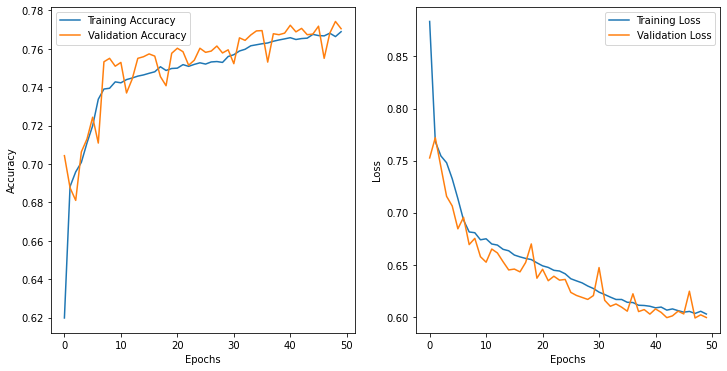

In [32]:
# Plot the accuracy vs epochs and loss vs epochs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Tuned Neural Net 

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Define the hyperparameters to tune over
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'hidden_size': [16]
}

# Convert y_train and y_test to one-hot encoded format
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)

best_score = 0

# Loop over all combinations of hyperparameters
for optimizer in param_grid['optimizer']:
    for hidden_size in param_grid['hidden_size']:
        
        # Create the neural network model
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            tf.keras.layers.Dense(hidden_size, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax')
        ])

        # Compile the model with the current hyperparameters
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model with early stopping
        early_stop = EarlyStopping(patience=5, restore_best_weights=True)
        history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)
        
        # Evaluate the model and store the best score and hyperparameters
        score = model.evaluate(X_test, y_test_encoded, verbose=0)[1]
        if score > best_score:
            best_score = score
            best_params = {'optimizer': optimizer, 'hidden_size': hidden_size}
            y_pred_encoded = model.predict(X_test)
            y_pred = encoder.inverse_transform(y_pred_encoded)

191/191 [==============================] - 0s 720us/step


In [30]:
# Print the best hyperparameters and classification report
print("Best parameters: ", best_params)
print(classification_report(y_test, y_pred))

Best parameters:  {'optimizer': 'adam', 'hidden_size': 16}
              precision    recall  f1-score   support

           0       0.62      0.88      0.72      1222
           1       0.80      0.72      0.76      2308
           2       0.86      0.77      0.81      2565

    accuracy                           0.77      6095
   macro avg       0.76      0.79      0.76      6095
weighted avg       0.79      0.77      0.77      6095

